In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
#Load the dataset
path="/content/drive/MyDrive/top_10000_1950-now (1) (2).xlsx"
df = pd.read_excel(path)


In [ ]:
#Drop the rows with the missing target (Popularity)
#df.dropna(subset=['Popularity'],inplace=True)

In [ ]:
#create binary popularity column (1=Popular,0=Not Popular)
df['Popular']=(df['Popularity']>50).astype(int)
df['Popularity_Binary']=df['Popular']

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Track_Name          9998 non-null   object 
 1   Artist_Names        9998 non-null   object 
 2   Album_Name          9997 non-null   object 
 3   Album_Artist_Names  9998 non-null   object 
 4   Disc_Number         9998 non-null   int64  
 5   Track_Number        9998 non-null   int64  
 6   Track_Duration_ms   9998 non-null   int64  
 7   Explicit            9998 non-null   bool   
 8   Popularity          9998 non-null   int64  
 9   Genre               9998 non-null   object 
 10  Danceability        9998 non-null   float64
 11  Energy              9998 non-null   float64
 12  Key                 9998 non-null   int64  
 13  Loudness            9998 non-null   float64
 14  Mode                9998 non-null   int64  
 15  Speechiness         9998 non-null   float64
 16  Acoust

In [ ]:
print(df['Popularity_Binary'].value_counts())


Popularity_Binary
0    6739
1    3259
Name: count, dtype: int64


In [ ]:
print(df.head())

             Track_Name                       Artist_Names  \
0  Streets Of Your Town                    The Go-Betweens   
1             Our House                            Madness   
2        Come On Eileen             Dexys Midnight Runners   
3               So Long                          Fischer-Z   
4     Boogie Wonderland  Earth\, Wind & Fire, The Emotions   

                Album_Name      Album_Artist_Names  Disc_Number  Track_Number  \
0           16 Lovers Lane         The Go-Betweens            1             6   
1                  Madness                 Madness            1             1   
2               Too Rye Ay  Dexys Midnight Runners            1            10   
3  Going Deaf For A Living               Fischer-Z            1             2   
4                     I Am     Earth\, Wind & Fire            1             5   

   Track_Duration_ms  Explicit  Popularity Genre  ...  Mode  Speechiness  \
0             216880     False          44   Pop  ...     1     


T-Test for Loudness:
T-statistic: 5.3546
P-value: 0.0000
Significant difference between popular and non-popular songs


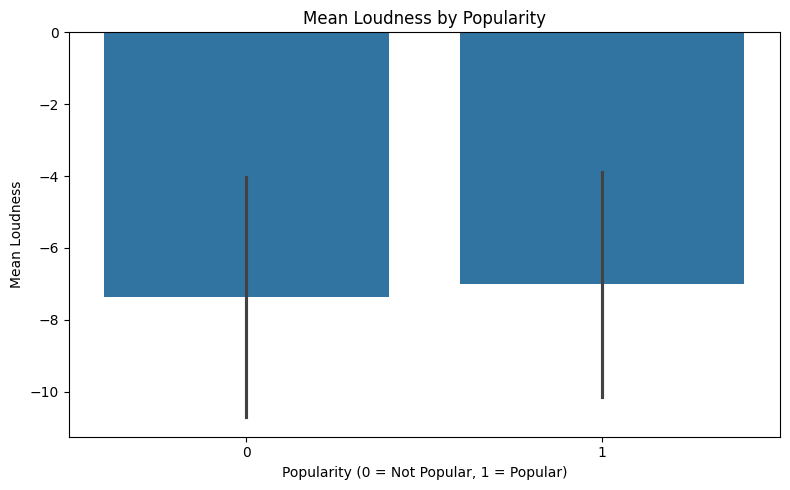


T-Test for Danceability:
T-statistic: 5.7771
P-value: 0.0000
Significant difference between popular and non-popular songs


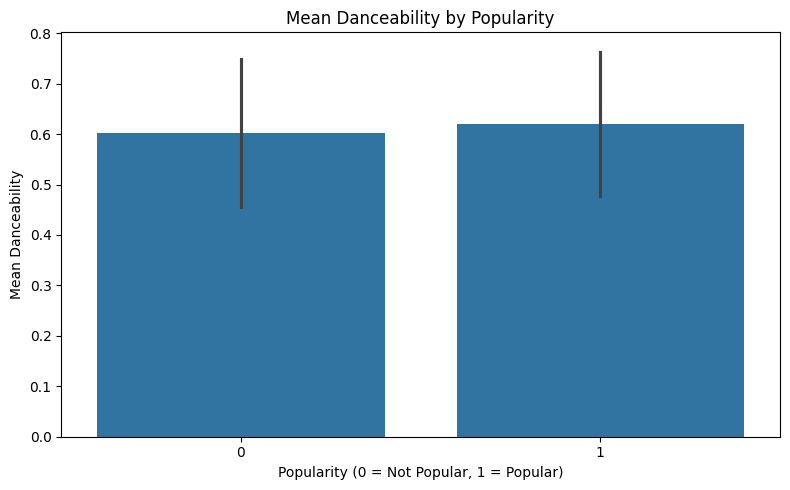


T-Test for Energy:
T-statistic: 0.9822
P-value: 0.3260
No significant difference between popular and non-popular songs


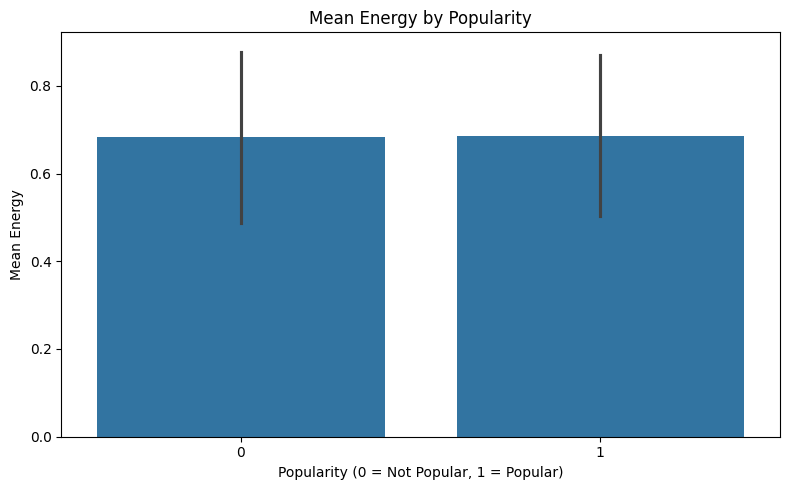


T-Test for Speechiness:
T-statistic: 2.4180
P-value: 0.0156
Significant difference between popular and non-popular songs


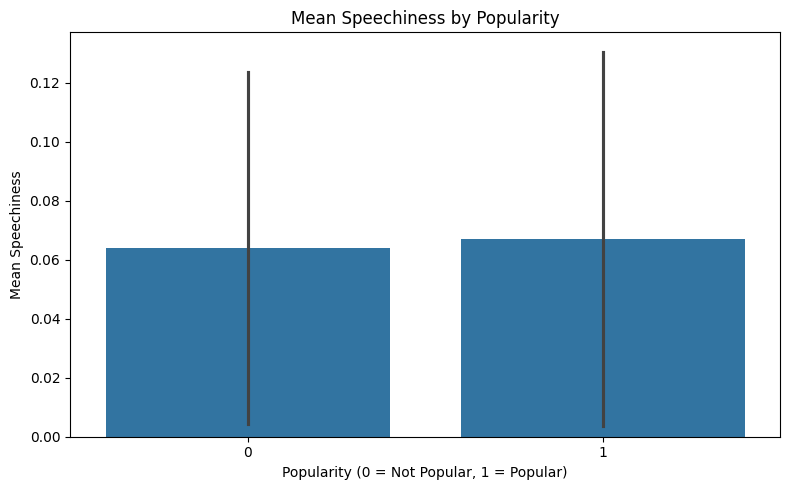


T-Test for Acousticness:
T-statistic: -4.5302
P-value: 0.0000
Significant difference between popular and non-popular songs


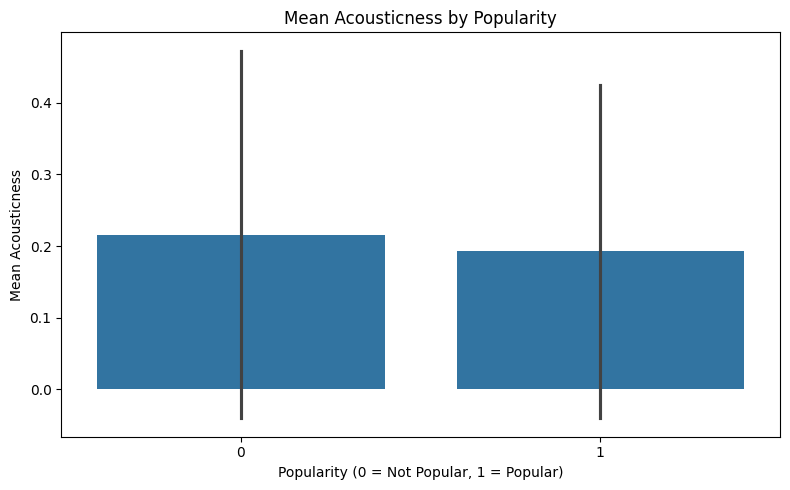


T-Test for Instrumentalness:
T-statistic: -4.2172
P-value: 0.0000
Significant difference between popular and non-popular songs


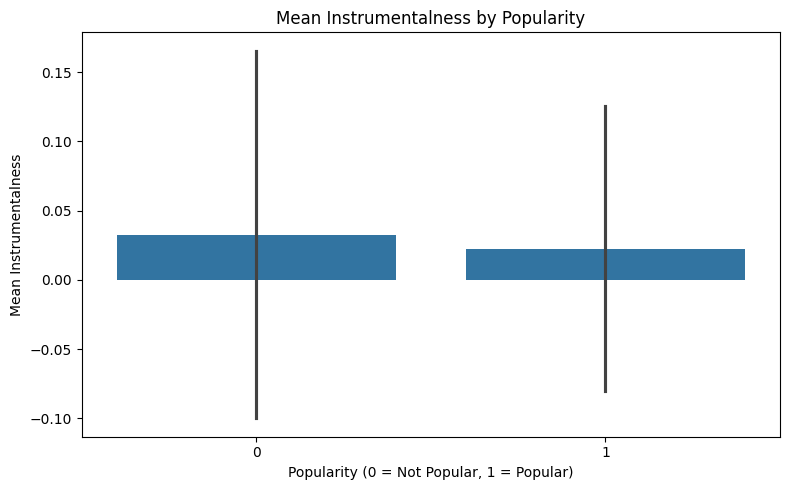


T-Test for Liveness:
T-statistic: -4.9242
P-value: 0.0000
Significant difference between popular and non-popular songs


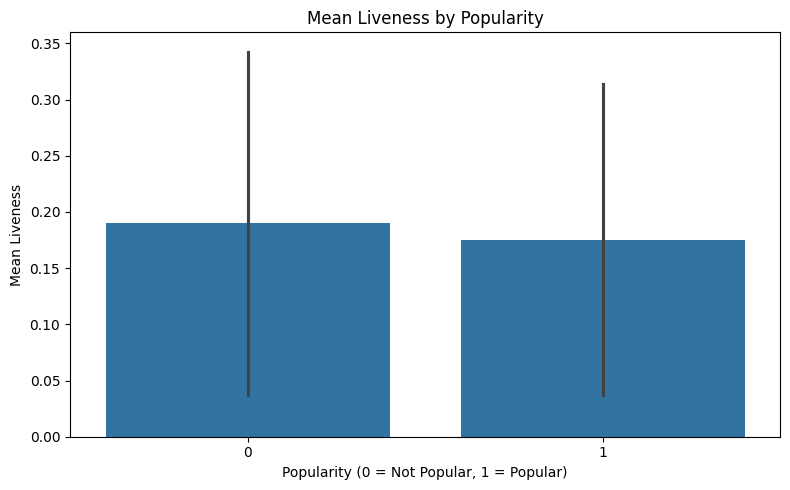


T-Test for Valence:
T-statistic: -2.2252
P-value: 0.0261
Significant difference between popular and non-popular songs


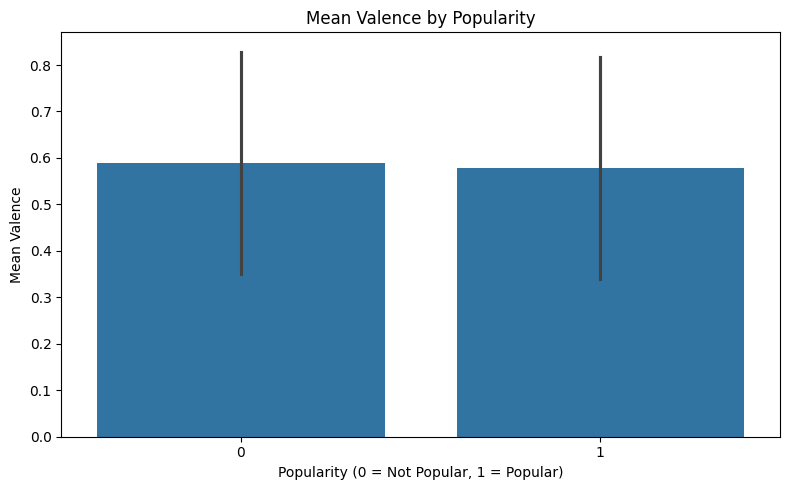


T-Test for Tempo:
T-statistic: -1.1998
P-value: 0.2303
No significant difference between popular and non-popular songs


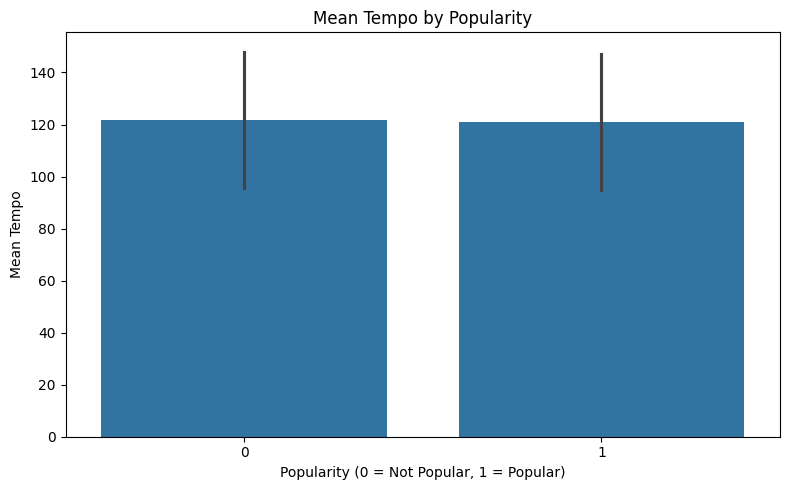

In [ ]:
# ## 1. T-Tests for Audio Features
#function to perform and print t-test results
# Function to perform and print t-test results
def perform_ttest(feature):
    popular = df[df['Popular'] == 1][feature]
    not_popular = df[df['Popular'] == 0][feature]

    t_stat, p_value = stats.ttest_ind(popular, not_popular, equal_var=False)

    print(f"\nT-Test for {feature}:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Significant difference between popular and non-popular songs")
    else:
        print("No significant difference between popular and non-popular songs")

    # Plot boxplot
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Popular', y=feature, data=df, errorbar='sd')

    plt.title(f'Mean {feature} by Popularity')
    plt.xlabel('Popularity (0 = Not Popular, 1 = Popular)')
    plt.ylabel(f'Mean {feature}')
    plt.tight_layout()
    plt.show()


# Perform t-tests for all features
features_to_test = ['Loudness', 'Danceability', 'Energy', 'Speechiness',
                   'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

for feature in features_to_test:
    perform_ttest(feature)

In [ ]:
# 2. ANOVA for Genre Popularity Differences
#clean data -remove the rows with missing Genre and Popularity
df_clean=df.dropna(subset=['Genre','Popularity'])

In [ ]:
#convert genre to categorical
df_clean['Genre']=df_clean['Genre'].astype('category')

In [ ]:
#Perform ANOVA
model=ols('Popularity~Genre',data=df_clean).fit()
anova_table=sm.stats.anova_lm(model,typ=2)

In [ ]:
print("\nANOVA RESULTS:")
print(anova_table)


ANOVA RESULTS:
                sum_sq      df          F        PR(>F)
Genre     1.232477e+05     4.0  41.313899  2.108635e-34
Residual  7.452787e+06  9993.0        NaN           NaN


In [ ]:
# Decision rule
p_value = anova_table['PR(>F)'][0]
if p_value < 0.05:
    print("\nConclusion: Reject H₀ (At least one genre has a significantly different popularity score)")
else:
    print("\nConclusion: Fail to reject H₀ (No significant difference in popularity across genres)")


Conclusion: Reject H₀ (At least one genre has a significantly different popularity score)


/tmp/ipython-input-17-3211061195.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


/tmp/ipython-input-18-4251274720.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]



Conclusion: Reject H₀ (At least one genre has a significantly different popularity score)

Identifying which specific genres differ...

Significant Differences Found (Corrected Interpretation):
- Hip Hop (mean=34.5) is significantly more popular than Jazz (mean=29.0) by 5.6 points (p = 0.0000)
- Hip Hop (mean=34.5) is significantly more popular than Metal (mean=29.6) by 4.9 points (p = 0.0000)
- Pop (mean=38.8) is significantly more popular than Hip Hop (mean=34.5) by 4.3 points (p = 0.0002)
- Pop (mean=38.8) is significantly more popular than Jazz (mean=29.0) by 9.8 points (p = 0.0000)
- Rock (mean=33.9) is significantly more popular than Jazz (mean=29.0) by 4.9 points (p = 0.0000)
- Pop (mean=38.8) is significantly more popular than Metal (mean=29.6) by 9.1 points (p = 0.0000)
- Rock (mean=33.9) is significantly more popular than Metal (mean=29.6) by 4.2 points (p = 0.0000)
- Pop (mean=38.8) is significantly more popular than Rock (mean=33.9) by 4.9 points (p = 0.0000)


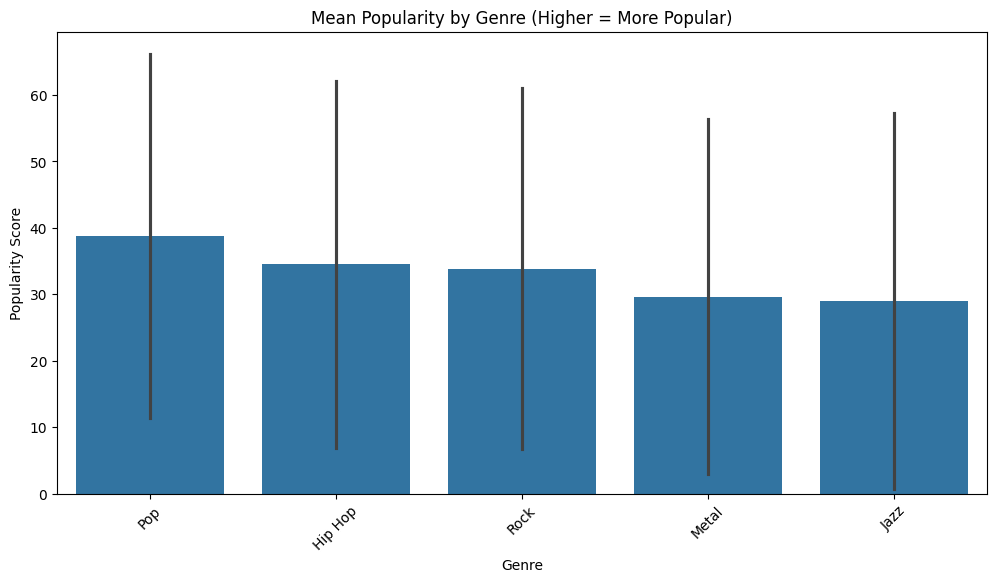

In [ ]:

# Decision rule
p_value = anova_table['PR(>F)'][0]
if p_value < 0.05:
    print("\nConclusion: Reject H₀ (At least one genre has a significantly different popularity score)")

    # Perform Tukey's HSD post-hoc test
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    print("\nIdentifying which specific genres differ...")
    tukey = pairwise_tukeyhsd(endog=df_clean['Popularity'],
                              groups=df_clean['Genre'],
                              alpha=0.05)

    # Convert results to DataFrame for easier processing
    # Corrected to use .summary().data as discussed
    tukey_df = pd.DataFrame(tukey.summary().data[1:],
                            columns=tukey.summary().data[0])

    # Filter significant pairs
    sig_pairs = tukey_df[tukey_df['reject'] == True]

    if len(sig_pairs) > 0:
        print("\nSignificant Differences Found (Corrected Interpretation):")

        # Create dictionary to store mean popularity for each genre
        # CORRECTED LINE: Apply observed=False directly to groupby, not to_dict()
        genre_means = df_clean.groupby('Genre', observed=False)['Popularity'].mean().to_dict()

        for _, row in sig_pairs.iterrows():
            genre1 = row['group1']
            genre2 = row['group2']
            p_adj = row['p-adj'] # Get the adjusted p-value directly
            mean_diff_abs = abs(row['meandiff']) # Absolute difference for display

            # Get the actual means for comparison
            mean_genre1 = genre_means[genre1]
            mean_genre2 = genre_means[genre2]

            # Determine which genre is truly more popular based on their actual means
            if mean_genre1 > mean_genre2:
                higher_pop = genre1
                lower_pop = genre2
            else:
                higher_pop = genre2
                lower_pop = genre1

            print(f"- {higher_pop} (mean={genre_means[higher_pop]:.1f}) is significantly "
                  f"more popular than {lower_pop} (mean={genre_means[lower_pop]:.1f}) "
                  f"by {mean_diff_abs:.1f} points (p = {p_adj:.4f})")

        # Visualize with sorted bar plot
        plt.figure(figsize=(12, 6))
        # CORRECTED LINE: Apply observed=False directly to groupby, not .index
        genre_order = df_clean.groupby('Genre', observed=False)['Popularity'].mean().sort_values(ascending=False).index
        sns.barplot(x='Genre', y='Popularity', data=df_clean, order=genre_order, errorbar='sd')
        plt.title('Mean Popularity by Genre (Higher = More Popular)')
        plt.xticks(rotation=45)
        plt.ylabel('Popularity Score')
        plt.show()

    else:
        print("No significant pairwise differences found between specific genres.")

else:
    print("\nConclusion: No significant differences between genres (p = {:.4f})".format(p_value))

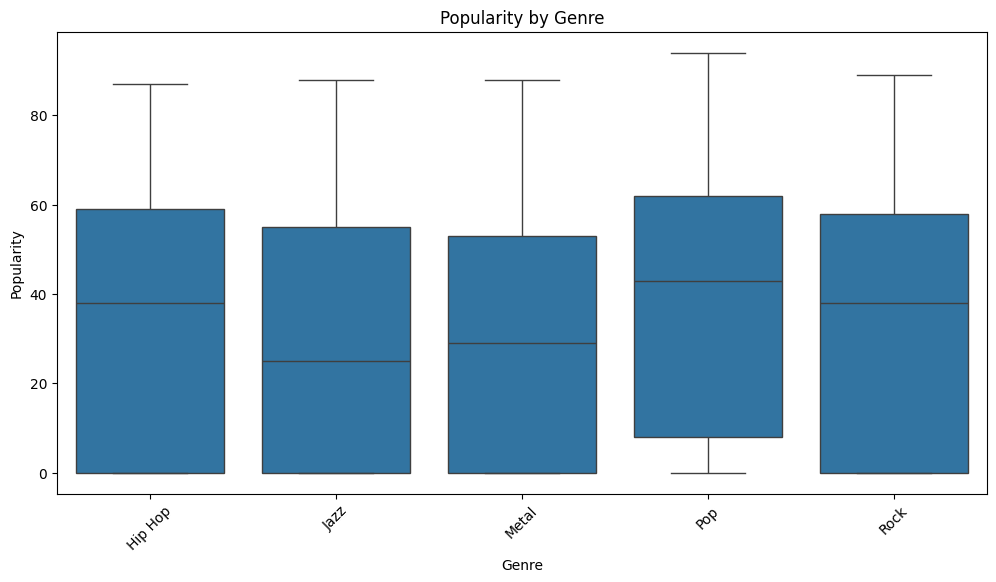

In [ ]:
# Plot popularity by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Popularity', data=df_clean)
plt.title('Popularity by Genre')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 3. Linear Regression for Popularity Prediction
features = ['Danceability', 'Energy', 'Loudness', 'Speechiness',
            'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']
X=df[features]
y=df['Popularity']

In [ ]:
# Drop rows with missing values
X = X.dropna()
y = y[X.index]

In [ ]:
# Add constant for intercept
X = sm.add_constant(X)

In [ ]:
# Fit linear regression model
model = sm.OLS(y, X).fit()


In [ ]:
# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     10.14
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           1.11e-15
Time:                        19:40:02   Log-Likelihood:                -47286.
No. Observations:                9998   AIC:                         9.459e+04
Df Residuals:                    9988   BIC:                         9.466e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               33.7979      3.038  

In [ ]:
# Calculate RMSE
predictions = model.predict(X)
rmse = np.sqrt(np.mean((y - predictions)**2))
print(f"\nRoot Mean Squared Error (RMSE): {rmse:.4f}")


Root Mean Squared Error (RMSE): 27.4025


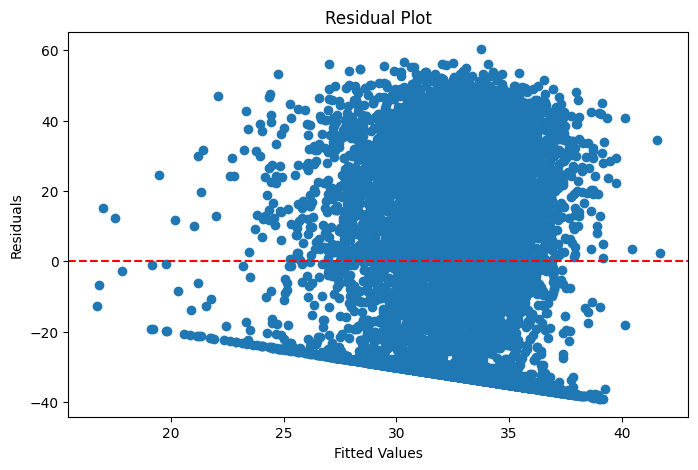

In [ ]:
# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(predictions, y - predictions)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
import pandas as pd

# Extract coefficients and p-values into a DataFrame
results = pd.DataFrame({
    'Feature': ['const', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
                'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
    'Coefficient': [33.7979, 12.3278, -4.6471, 0.3882, 5.2058,
                    -3.0073, -13.502, -4.8936, -4.2631, 0.0053],
    'P-value': [0.000, 0.000, 0.064, 0.011, 0.262,
                0.038, 0.000, 0.010, 0.050, 0.600]
})

# Filter significant features (p < 0.05) and non-constant
significant = results[(results['P-value'] < 0.05) & (results['Feature'] != 'const')]

# Print conclusions
print("Key Findings: How Audio Features Affect Popularity\n" + "-" * 50)
for _, row in significant.iterrows():
    effect = "INCREASES" if row['Coefficient'] > 0 else "DECREASES"
    print(f"- {row['Feature']}: {effect} popularity (Effect Size = {abs(row['Coefficient']):.2f}, p = {row['P-value']:.3f})")

# Print model fit note
print("\nNote: Model explains only 0.9% of popularity variance (R-squared = 0.009).")

Key Findings: How Audio Features Affect Popularity
--------------------------------------------------
- Danceability: INCREASES popularity (Effect Size = 12.33, p = 0.000)
- Loudness: INCREASES popularity (Effect Size = 0.39, p = 0.011)
- Acousticness: DECREASES popularity (Effect Size = 3.01, p = 0.038)
- Instrumentalness: DECREASES popularity (Effect Size = 13.50, p = 0.000)
- Liveness: DECREASES popularity (Effect Size = 4.89, p = 0.010)

Note: Model explains only 0.9% of popularity variance (R-squared = 0.009).


In [ ]:
# 4. Logistic Regression for Popularity Classification
# Use only significant features (removing 'Tempo' and 'Energy')
significant_features = ['Loudness', 'Danceability', 'Speechiness',
                        'Acousticness', 'Instrumentalness', 'Liveness', 'Valence']

X = df[significant_features]
y = df['Popularity_Binary']

# Drop missing values
X = X.dropna()
y = y.loc[X.index]

# Split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")



Model Accuracy: 0.6870


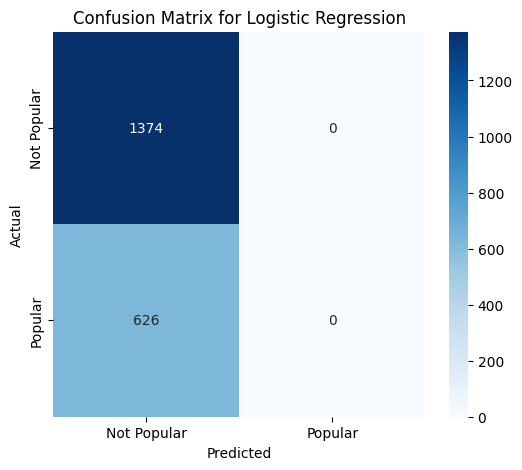

Accuracy: 0.6870

Classification Report:
              precision    recall  f1-score   support

 Not Popular       0.69      1.00      0.81      1374
     Popular       0.00      0.00      0.00       626

    accuracy                           0.69      2000
   macro avg       0.34      0.50      0.41      2000
weighted avg       0.47      0.69      0.56      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict using your logistic regression model
y_pred = model.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Popular', 'Popular']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# 2. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels))


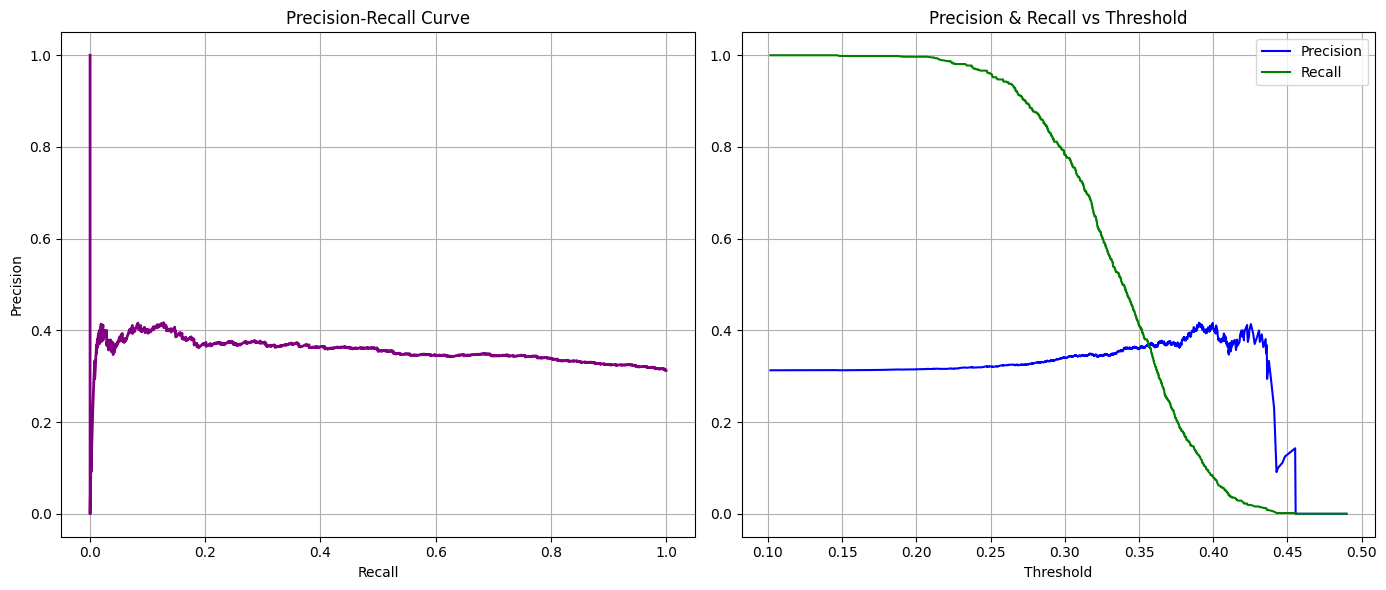

Average Precision Score: 0.3567


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model again on scaled training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Get predicted probabilities for positive class (i.e., Popular = 1)
y_scores = model.predict_proba(X_test_scaled)[:, 1]

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
aps = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve and Threshold Trade-off
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='purple', linewidth=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.title('Precision & Recall vs Threshold')
plt.xlabel('Threshold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print Average Precision Score
print(f"Average Precision Score: {aps:.4f}")



In [ ]:
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 68.70%


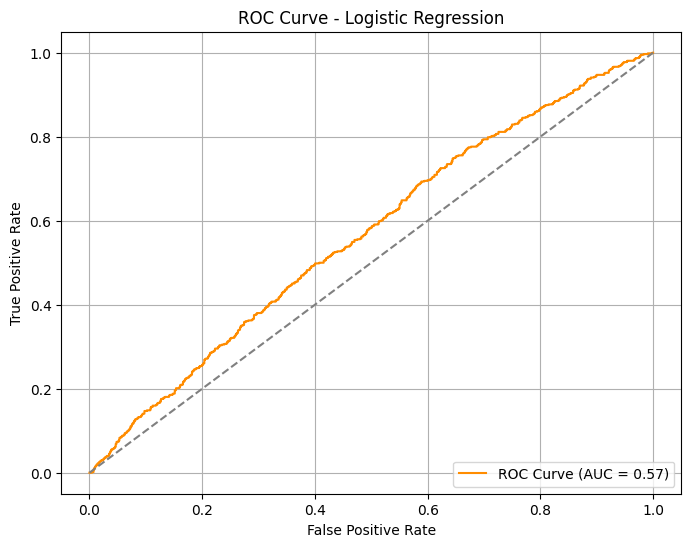

ROC AUC Score: 0.5652


In [ ]:
#ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate FPR, TPR, and AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print ROC AUC Score
print(f"ROC AUC Score: {roc_auc:.4f}")


In [ ]:
# 5. K-Means Clustering with PCA Visualization

In [ ]:
cluster_features = ['Danceability', 'Energy', 'Tempo', 'Loudness',
                   'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence']
X_cluster = df[cluster_features]

In [ ]:
# Drop rows with missing values
X_cluster = X_cluster.dropna()


In [ ]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [ ]:
# Elbow method to determine optimal number of clusters
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

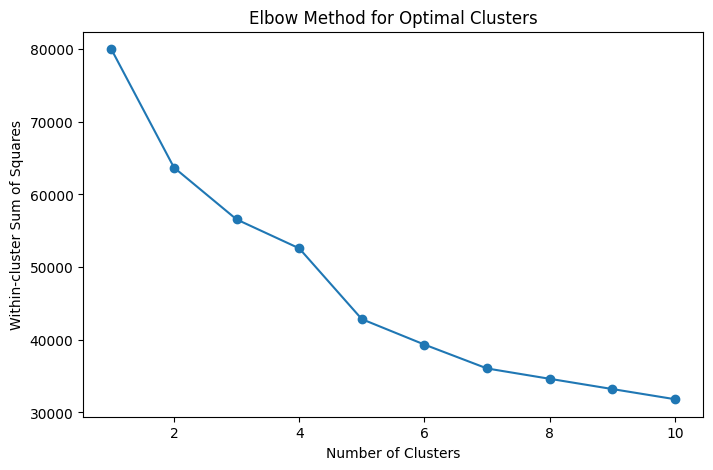

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

In [ ]:
# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [ ]:
# Add cluster labels to original data
df_clustered = X_cluster.copy()
df_clustered['Cluster'] = clusters

In [ ]:
# PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)


In [ ]:
# Create DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

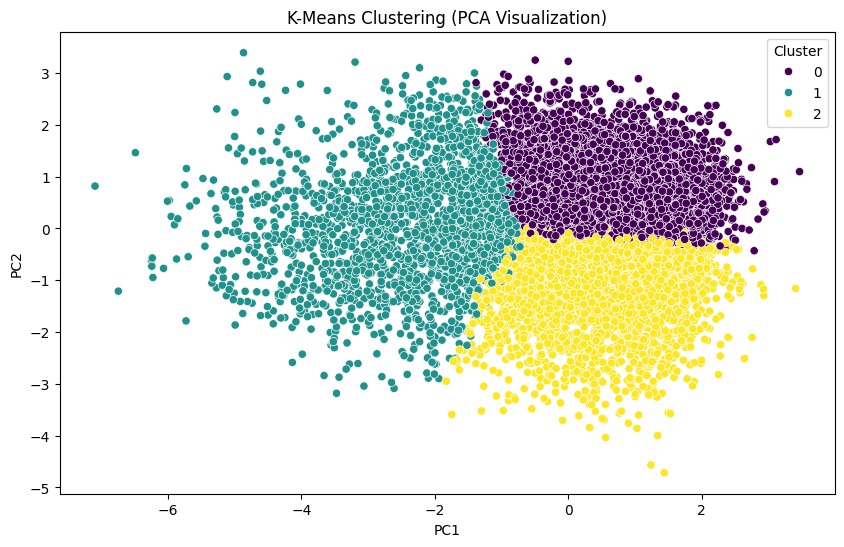

In [ ]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('K-Means Clustering (PCA Visualization)')
plt.show()

In [ ]:
# Analyze cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(data=cluster_centers, columns=cluster_features)
cluster_centers_df['Cluster'] = range(3)

In [ ]:
print("\nCluster Centers (Original Scale):")
print(cluster_centers_df)


Cluster Centers (Original Scale):
   Danceability    Energy       Tempo   Loudness  Speechiness  Acousticness  \
0      0.711114  0.740889  116.226108  -6.743683     0.071937      0.133743   
1      0.531464  0.425273  112.697941 -10.848174     0.044329      0.546153   
2      0.520650  0.778294  134.566486  -5.563493     0.069464      0.085593   

   Instrumentalness   Valence  Cluster  
0          0.030022  0.747247        0  
1          0.030041  0.463817        1  
2          0.028204  0.450095        2  
